In [1]:
import nltk
import re
nltk.download('gutenberg')

from nltk.corpus import gutenberg

# Download the "blake-poems" and "austen-emma" texts
blake_poems = gutenberg.raw('blake-poems.txt')
austen_emma = gutenberg.raw('austen-emma.txt')

def separate_poem_into_chapters(poem):
    chapters = re.split(r'\n \n(?=[A-Z ]+\n)', blake_poems)
    return chapters[2:]

blake_chapters = separate_poem_into_chapters(blake_poems)

austen_chapters = separate_poem_into_chapters(austen_emma)

[nltk_data] Downloading package gutenberg to /home/saim/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/saim/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


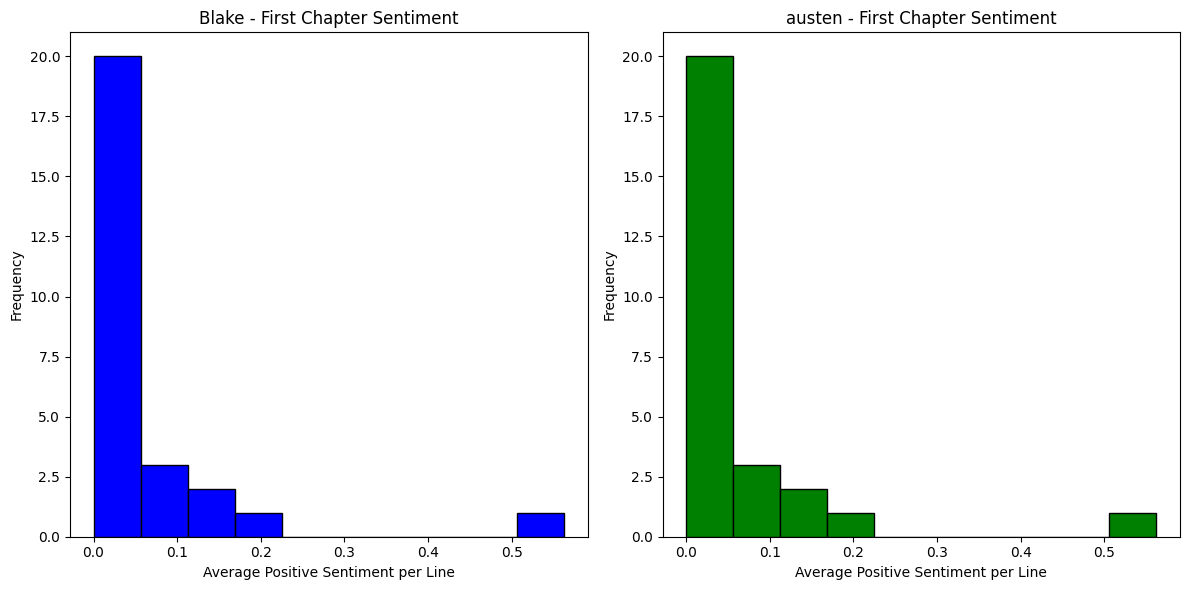

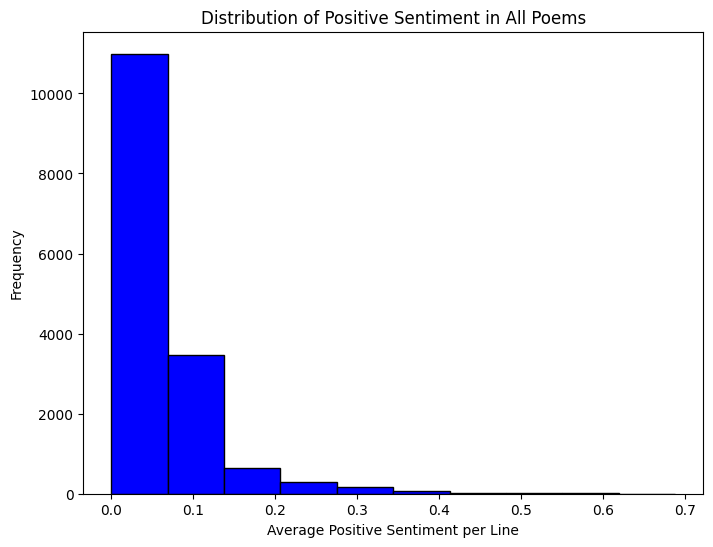

In [3]:
from nltk.corpus import sentiwordnet as swn
import matplotlib.pyplot as plt
import numpy as np

# Download the SentiWordNet data
nltk.download('sentiwordnet')

# Define a function to split the text into lines
def tokenize_lines(text):
    return re.split(r'\n+', text)

# Calculate the average positive sentiment for a line using SentiWordNet
def average_positive_sentiment(line):
    total_positive_sentiment = 0.0
    token_count = 0
    for token in line.split():
        senti_synsets = list(swn.senti_synsets(token))
        if senti_synsets:
            total_positive_sentiment += sum(senti_pos_pos.pos_score() for senti_pos_pos in senti_synsets)
            token_count += len(senti_synsets)
    
    if token_count > 0:
        return total_positive_sentiment / token_count
    else:
        return 0.0

# Extract the first chapter from both poems for analysis
first_chapter_blake = blake_chapters[0]
first_chapter_austen = austen_chapters[0]

# Calculate the average positive sentiment for each line in the first chapter of both poems
sentiments_first_chapter_blake = [average_positive_sentiment(line) for line in tokenize_lines(first_chapter_blake)]
sentiments_first_chapter_austen = [average_positive_sentiment(line) for line in tokenize_lines(first_chapter_austen)]

min_sentiment_first_chapter = min(sentiments_first_chapter_blake + sentiments_first_chapter_austen)
max_sentiment_first_chapter = max(sentiments_first_chapter_blake + sentiments_first_chapter_austen)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(sentiments_first_chapter_blake, bins=np.linspace(min_sentiment_first_chapter, max_sentiment_first_chapter, 11), color='blue', edgecolor='black')
plt.title('Blake - First Chapter Sentiment')
plt.xlabel('Average Positive Sentiment per Line')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sentiments_first_chapter_austen, bins=np.linspace(min_sentiment_first_chapter, max_sentiment_first_chapter, 11), color='green', edgecolor='black')
plt.title('austen - First Chapter Sentiment')
plt.xlabel('Average Positive Sentiment per Line')
plt.ylabel('Frequency')

plt.tight_layout()

combined_text = blake_poems + austen_emma

# Tokenize the combined text into lines
lines_all_poems = tokenize_lines(combined_text)

sentiments_all_poems = [average_positive_sentiment(line) for line in lines_all_poems]

min_sentiment_all_poems = min(sentiments_all_poems)
max_sentiment_all_poems = max(sentiments_all_poems)

plt.figure(figsize=(8, 6))
plt.hist(sentiments_all_poems, bins=np.linspace(min_sentiment_all_poems, max_sentiment_all_poems, 11), color='blue', edgecolor='black')
plt.title('Distribution of Positive Sentiment in All Poems')
plt.xlabel('Average Positive Sentiment per Line')
plt.ylabel('Frequency')

plt.show()